# CME 250 Machine Learning Project 1
## -- Sweekar Bengaluru

Data Source: The data for this project is obtained from https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset


### Introduction
The project is on using Machine learning algorithms to build a simple song recommendation engine. User will input one song and will receive 5 songs that are closest to the song, the user has selected or the song list which user is most likely appreciate. The algorithm is based on quantifying song based on number of its features such as energy, danceability, valence, genre among others. K Nearest neighbours or shortest euclidean distance is calculated from set of songs in database and top 5 songs with close match are recommended. Principal component analysis which is dimensionality reduction technique is also applied in the process.


### Data Exploration: Choosing Features:
Energy, Danceability, Liveness, Valence, Acousticness, Speechiness are used as the variable set

#### Q1) What would be the advantages, disadvantages of using other variables such as Popularity, Year and BPM?

Soln: Popularity: Advantage of using Popularity as the metric would enable engine to recommend song which user could have most likely heard somewhere but on flip side, this song need not be the one that matches user taste. The song could be of different genre or energy or mood than what user is expecting. Popularity could skew matrix away from personalisation. However, once 5 songs are picked, they could be ordered by popularity which could provide best personalised match recommendation to user.

Year: Songs and technology have transitioned over years, the songs have transitioned from acoustic and instrumental to more of danceable and energetic over years. With advent of computers, range of beats are in use, audio effects have improved. Advantage of Year as a metric would help pick songs either from same or similar artist from that generation. This could be a good metric for users who would like to listen only to particular generation for ex: 1970s. However, it might not be a good metric for users scouting for songs or for ones who trying to explore songs regardless of the year or artist. This could drive recommendation to extremes, either user could like the recommendation list or dislike entirely

BPM: This is a very good metric as it captures and couples with the other features such as Energy or Danceability. Users tend to like similar BPM songs. Disadvatage would be that the recommendation list would be monotonous, that is all the songs recommeded would be either fast with high temp or slow with lower tempo. Recommendation list would lack diversity. Although its a good metric, when weighted, it could be a very good metric to consider for choosing songs.

#### Q2) Plot the distribution of each variable , What can be observed?


Importing required packages and dataset. The dataset is the modified such as column names are changed and Genre is replaced by dummy variables

In [2]:
#Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("Spotify-2000.csv") #Datasets
df = df.rename(columns={'Beats Per Minute (BPM)':'BPM','Top Genre':'Genre'}) #Modify dataset
Unique_genre = list(set(df.Genre))
Unique_number = list(range(0,len(Unique_genre)))
df['Genre'].replace(Unique_genre,Unique_number, inplace=True)

#### Plotting data
Class interval of 5 is used and 20 bins are used for plotting the histogram

Text(0.5, 1.0, 'Speechiness distribution')

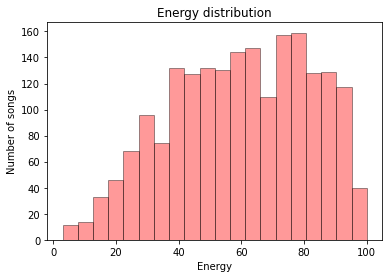

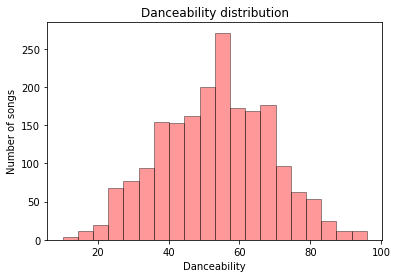

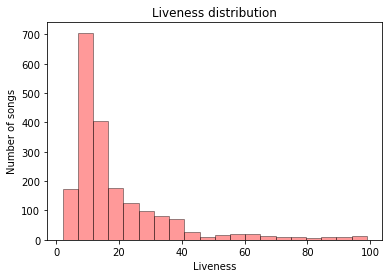

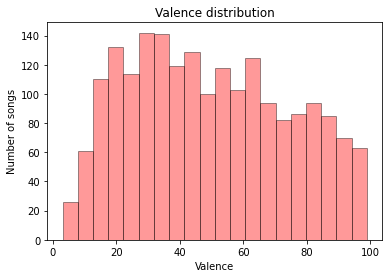

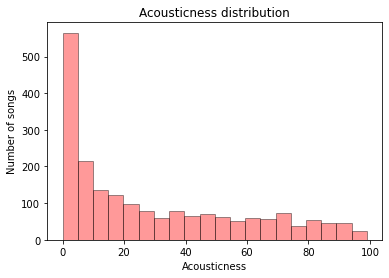

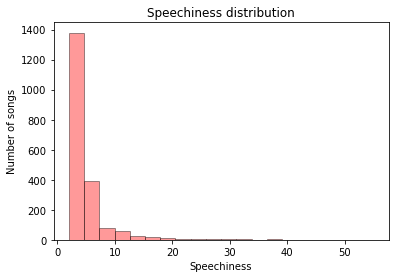

In [3]:
plt.figure()
sns.distplot(df.Energy,hist=True,kde=False,color='red',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Energy")
plt.ylabel("Number of songs")
plt.title('Energy distribution')
plt.figure()
sns.distplot(df.Danceability,hist=True,kde=False,color='red',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Danceability")
plt.ylabel("Number of songs")
plt.title('Danceability distribution')
plt.figure()
sns.distplot(df.Liveness,hist=True,kde=False,color='red',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Liveness")
plt.ylabel("Number of songs")
plt.title('Liveness distribution')
plt.figure()
sns.distplot(df.Valence,hist=True,kde=False,color='red',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Valence")
plt.ylabel("Number of songs")
plt.title('Valence distribution')
plt.figure()
sns.distplot(df.Acousticness,hist=True,kde=False,color='red',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Acousticness")
plt.ylabel("Number of songs")
plt.title('Acousticness distribution')
plt.figure()
sns.distplot(df.Speechiness,hist=True,kde=False,color='red',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Speechiness")
plt.ylabel("Number of songs")
plt.title('Speechiness distribution')

From histogram, its clear that songs are widely and almost equally spread in terms of energy and valence. This means that the dataset has good mix of songs with high energy and low energy, positive mood and negative mood
Danceability follows normal distribution which shows that more songs are centered around mean danceability and there are lesser songs which have extremely high or low danceability. Speechiness, Acousticness and Liveness are all skewed on lower side. This shows that in database, most songs have less speech, less live performances and more electronic equipments.

This distribution can also be visualised with the scatterplot of the parameters

Text(0.5, 1.0, 'Speechiness distribution')

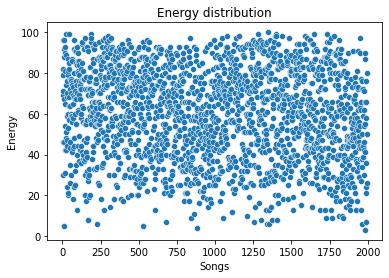

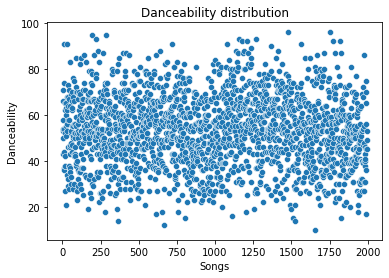

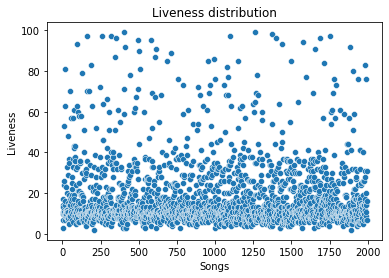

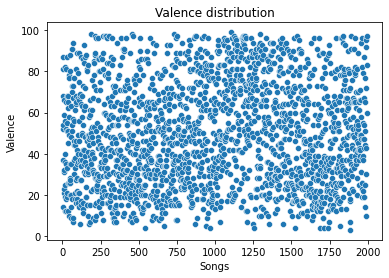

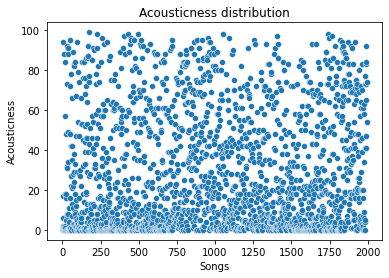

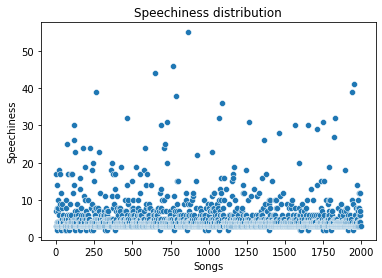

In [4]:
plt.figure()
sns.scatterplot(x=df.Index,y=df.Energy)
plt.xlabel("Songs")
plt.ylabel("Energy")
plt.title('Energy distribution')
plt.figure()
sns.scatterplot(x=df.Index,y=df.Danceability)
plt.xlabel("Songs")
plt.ylabel("Danceability")
plt.title('Danceability distribution')
plt.figure()
sns.scatterplot(x=df.Index,y=df.Liveness)
plt.xlabel("Songs")
plt.ylabel("Liveness")
plt.title('Liveness distribution')
plt.figure()
sns.scatterplot(x=df.Index,y=df.Valence)
plt.xlabel("Songs")
plt.ylabel("Valence")
plt.title('Valence distribution')
plt.figure()
sns.scatterplot(x=df.Index,y=df.Acousticness)
plt.xlabel("Songs")
plt.ylabel("Acousticness")
plt.title('Acousticness distribution')
plt.figure()
sns.scatterplot(x=df.Index,y=df.Speechiness)
plt.xlabel("Songs")
plt.ylabel("Speechiness")
plt.title('Speechiness distribution')

##### But, How would these distribution look like for Popularity, Year and BPM


Text(0.5, 1.0, 'Popularity distribution')

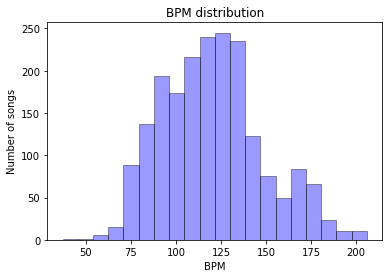

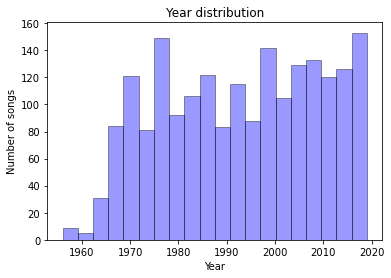

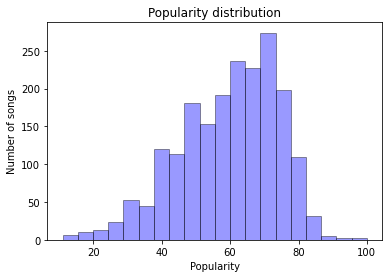

In [5]:
plt.figure()
sns.distplot(df.BPM,hist=True,kde=False,color='blue',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("BPM")
plt.ylabel("Number of songs")
plt.title('BPM distribution')
plt.figure()
sns.distplot(df.Year,hist=True,kde=False,color='blue',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.title('Year distribution')
plt.figure()
sns.distplot(df.Popularity,hist=True,kde=False,color='blue',bins=int(100/5),hist_kws={'edgecolor':'black'})
plt.xlabel("Popularity")
plt.ylabel("Number of songs")
plt.title('Popularity distribution')

Text(0.5, 1.0, 'Popularity distribution')

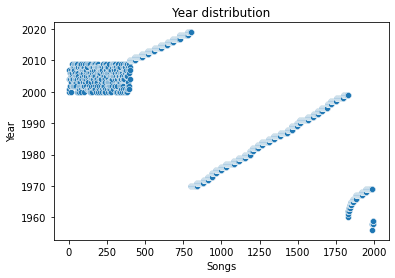

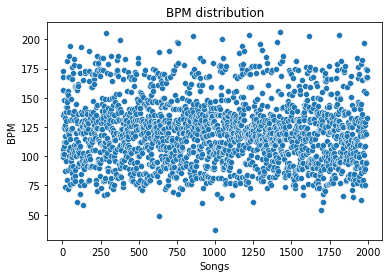

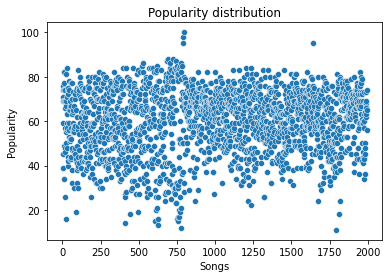

In [6]:
plt.figure()
sns.scatterplot(x=df.Index,y=df.Year)
plt.xlabel("Songs")
plt.ylabel("Year")
plt.title('Year distribution')
#plt.subplot(3,1,2)
plt.figure()
sns.scatterplot(x=df.Index,y=df.BPM)
plt.xlabel("Songs")
plt.ylabel("BPM")
plt.title('BPM distribution')
#plt.subplot(3,1,3)
plt.figure()
sns.scatterplot(x=df.Index,y=df.Popularity)
plt.xlabel("Songs")
plt.ylabel("Popularity")
plt.title('Popularity distribution')

BPM and popularity follows normal distribution where as Year, there seems to be lot of songs from 2000-2010 compared to other generation. This would hence also not be a good metric to consider since majority of songs are in one particular year grouping, highly likely that metrics for song selection would be skewed and biased.

### Normalising the features Is it required?

#### Q2) Is Normalising of features required?

It is vital that features are normalised. This prevents skewing of algorithms for the outlier points. Also dimensionality reduction algorithms such as PCA relies heavily on normalisation


In [7]:
df_new = df[['Energy','Danceability','Liveness','Valence','Acousticness','Speechiness']] #Create subset of dataset

#Using MinMax scaling mean is not zero
X = df_new.values
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
df_normalised = pd.DataFrame(X_scaled, columns=df_new.columns)

#Using Standard scaling for normalising mean is at zero
ss=StandardScaler()
X_scaled_2 = ss.fit_transform(X)


##### There are two different scaling methods employed in this project. MinMaxScaling which places data in 0 to 1 range and standard scaling which sets mean at 0.
##### The performance of MinMax scaling was better than Standard scaling in terms of explaining data variance and song predictions, and hence MinMax scaling adopted for the rest of code


### Dimensionality reduction PCA implemention


#### Q3) Calculate two principal components using PCA 

For dimensionality reduction and for implementing PCA, its vital to choose number of PCA components such that the PCA compnents explains atleast 95% of variance in the data. In order to figure out the right number of PCA components following study was carried out


Variance explained by First 5 components:  0.9767969587693422


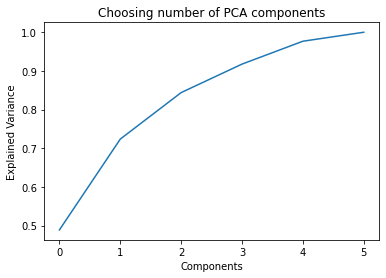

In [8]:
#To figure out number of features to retain to have 95% representation of data
pca = PCA(n_components=6,random_state=0)
X_pca = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("Choosing number of PCA components")
print("Variance explained by First 5 components: ",np.cumsum(pca.explained_variance_ratio_)[4])

The graph shows we need 5 components to explain 95% variation in data. 

Hence, this has reduced 6 dimensions to 5. The following code further breaks PCA and attempts to explain the variance accounted in first and second principal components

In [9]:
#To calculate PCA using either standard scaling or minmax scaling, using minmax as it gives better results
pca_2 = PCA(n_components=5,random_state=0) #5Components chosen
X_pca_2 = pca_2.fit_transform(X_scaled)   #Minmaxscaler does better job
df_PCA = pd.DataFrame(X_pca_2,columns=['pc1','pc2','pc3','pc4','pc5'])
print("Variance explained by first principal component is  ",pca_2.explained_variance_ratio_[0])
print("Variance explained by second principal component is  ",pca_2.explained_variance_ratio_[1])
print((1-np.cumsum(pca.explained_variance_ratio_)[1])*100,' % data is lost if only 2 components considered\n')

Variance explained by first principal component is   0.48886169912977384
Variance explained by second principal component is   0.23488228458636287
27.62560162838633  % data is lost if only 2 components considered



##### Hence, first and second principal components explain about 63% of variance in data causing a loss of 27%

#### What does 1st and 2nd PCA components summarise?
In order to answer this question, we could plot bar graph summarising contribution of each feature to PCA

Maj 1st PCA suggests song with Lower valence, High acouticness,lower energy, maj 2nd PCA suggests song with high danceability and higher acouticness,higher valence


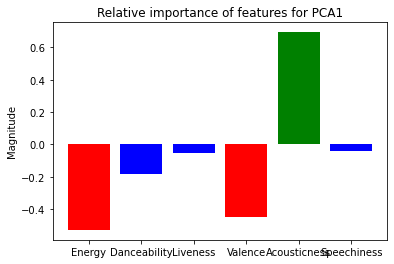

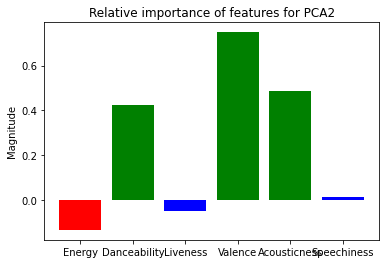

In [10]:
pca1_comp = pca_2.components_[0]
pca2_comp = pca_2.components_[1]
plt.figure()
dummy = [1,2,3,4,5,6]
tick_label = ['Energy','Danceability','Liveness','Valence','Acousticness','Speechiness']
plt.bar(dummy,pca1_comp,tick_label = tick_label,width = 0.8,color = "rbbrgb")
plt.ylabel("Magnitude")
plt.title("Relative importance of features for PCA1")
plt.figure()
plt.bar(dummy,pca2_comp,tick_label = tick_label,width = 0.8,color = "rgbggb")
plt.ylabel("Magnitude")
plt.title("Relative importance of features for PCA2")
print("Maj 1st PCA suggests song with Lower valence, High acouticness,lower energy, maj 2nd PCA suggests song with high danceability and higher acouticness,higher valence")

The graph indicates the 1st PCA explains Energy, Valence and Acousticness. Maximum value of 1st PCA would be the song which has lower energy, negative mood and high acousticness or non electronic component sound.
Second graph on 2nd PCA explains Danceability, Valence and Acouticness. Maximum value of 2nd PCA would be the song which has high danceability, positive mood and high acousticness or non electronic component sound.


This could be further visualised by plotting the scatter plot spread PCA1 vs PCA2 against 4 important parameters, Danceability, Energy, Acousticness and Valence.


Text(0.5, 1.0, 'PCA1 vs PCA2 Acousticness')

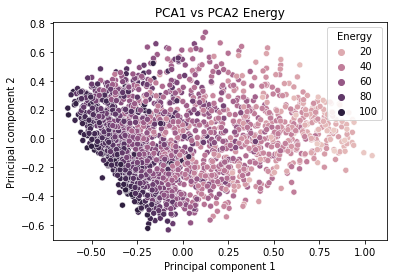

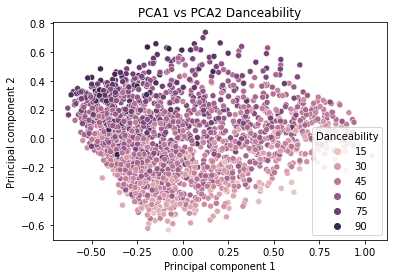

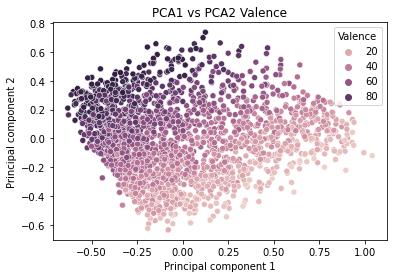

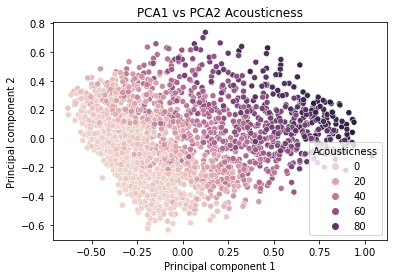

In [11]:
#Scatterplot of 1st and 2nd principal component
plt.figure()
sns.scatterplot(x=df_PCA.pc1,y=df_PCA.pc2,hue=df.Energy)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA1 vs PCA2 Energy")
plt.figure()
sns.scatterplot(x=df_PCA.pc1,y=df_PCA.pc2,hue=df.Danceability)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA1 vs PCA2 Danceability")
plt.figure()
sns.scatterplot(x=df_PCA.pc1,y=df_PCA.pc2,hue=df.Valence)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA1 vs PCA2 Valence")
plt.figure()
sns.scatterplot(x=df_PCA.pc1,y=df_PCA.pc2,hue=df.Acousticness)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA1 vs PCA2 Acousticness")

These graphs further show how 1st PCA is summarizing energy, valence and acousticness while second is summarising danceability, valence and acousticness.

#### Which are the songs which have maximum value for 1st and 2nd PCA and minimum values for 1st and 2nd PCA?


In [12]:
#Convert dataframe to list to find max and min songs for PCA1,PCA2      
pca1_list = df_PCA.pc1.tolist()
pca2_list = df_PCA.pc2.tolist()
PCA1_maxsong = df.Title[pca1_list.index(max(pca1_list))]
PCA1_minsong = df.Title[pca1_list.index(min(pca1_list))]
PCA2_maxsong = df.Title[pca2_list.index(max(pca2_list))]
PCA2_minsong = df.Title[pca2_list.index(min(pca2_list))]
print("The song at the maximum value of first principal component is ",PCA1_maxsong)
print("The song at the minimum value of first principal component is ",PCA1_minsong)
print("The song at the maximum value of second principal component is ",PCA2_maxsong)
print("The song at the minimum value of second principal component is ",PCA2_minsong)

The song at the maximum value of first principal component is  Theme from Harry's Game
The song at the minimum value of first principal component is  Just Can't Get Enough (Live in Hammersmith) - 2018 Remaster
The song at the maximum value of second principal component is  Thank God I'm a Country Boy
The song at the minimum value of second principal component is  Live Forever - Remastered


Theme from Harry's game has negative mood (Post war and losses), low energy and non-electronic components for music whereas Just cant get enough has electronic components for the background music, high energy(96) and positive mood. Though its also a song which has relatively higher danceability.(65)
Thank God I'm a country boy is a song with higher danceability(76), positive mood and has electronic components for background music. It has a relatively better energy(54) whereas Live-Forever is a song which has lower danceability and non-electronic components. Angel of death is also relatively close with lower danceability and non-electronic components and negative mood.


### Calculate song recommendations
#### Q4) Find 5 best songs for the chosen song

Euclidean distance (Second norm) is calculated between vector from test song and each song in the database. The distance is sorted and the 5 songs with least distance is returned as the recommended song list.


In [13]:
#Chose song and convert dataframe to numpy arrays
CSong_index = 1039  # User Input
#Testsong = df_PCA.iloc[CSong_index].tolist() #Assign the values from chosen index to list
#Testsongarray = np.array(Testsong) #Convert list to an array
Testsongarray = df_PCA.iloc[CSong_index].to_numpy()
Spotifysongarray = df_PCA.to_numpy()

dist = np.zeros(len(Spotifysongarray)) #Intialise array to calculate distance
for i in range(len(Spotifysongarray)): #Calculates distance between all songs and testsongs L2
    dist[i] = np.linalg.norm(Spotifysongarray[i]-Testsongarray)
    
idx = np.argsort(dist) #Returns index of the sort from small to large which would correspond to index of original dataframe

print("The chosen song is at index ",idx[0],"and song is: ",df.Title[idx[0]])
for j in range(1,6):
    print("The ",j,"st closest song to played song is : ",df.Title[idx[j]])


The chosen song is at index  1039 and song is:  We Are The Champions - Remastered 2011
The  1 st closest song to played song is :  Where the Wild Roses Grow - 2011 - Remaster
The  2 st closest song to played song is :  Omarm
The  3 st closest song to played song is :  Zij
The  4 st closest song to played song is :  De Bestemming
The  5 st closest song to played song is :  Hald Mich 'S Vas


We are the champions was the chosen song from Queens band and 5 recommendations were Where the wild roses grow, Omarm, Zij, De Bestemming, Hald Mich S Vas, these songs although they match the energy and danceability, they are not really the great recommendations. In order to improve, BPM and Genre could be included. Users are highly likely to relate to BPM than other features.
Genre helps to provide recommendation from that class of songs.

Choosing Titanium would return Addicted to you, Californication,Thunder, Feel and Sweet disposition which are good song recommendations.

### Extension : Clustering

Calculating the distances for all songs could be cumbersome. Although not required in this excercise, clustering would help further improve song recommendation engine. It could help to figure out if the second song is chosen, what could be the possibility that it is similar to songs that user listens.


In order to figure out right number of clusters, number of clusters are varied and error is observed and knee point is chosen as the cluster for this code

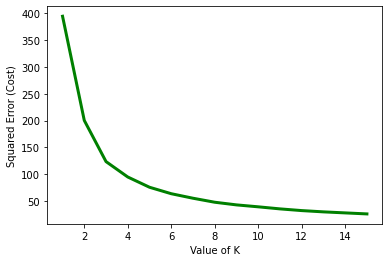

In [14]:
#Clustering songs based on PCA1 PCA2
pca_3 = PCA(n_components=2,random_state=0) #5Components chosen
X_pca_3 = pca_3.fit_transform(X_scaled)   #Minmaxscaler does better job
df_PCA_3 = pd.DataFrame(X_pca_3,columns=['pc1','pc2'])
kmax = 15
sse = []
for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X_pca_3)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(X_pca_3)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(X_pca_3)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (X_pca_3[i, 0] - curr_center[0]) ** 2 + (X_pca_3[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)

plt.figure()    
plt.plot(range(1, kmax+1), sse, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

This shows cluster number of 6 would be optimal

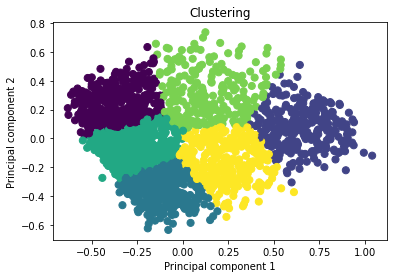

In [15]:
y_kmeans = KMeans(n_clusters=6).fit_predict(X_pca_3)
plt.figure()
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Clustering")
plt.show()

### Extension: Incorporation of Genre and Popularity


###### All the steps are repeated with Genre and Popularity as the additional features in the datasets.


In [16]:
df = pd.read_csv("Spotify-2000.csv") #Datasets
df = df.rename(columns={'Beats Per Minute (BPM)':'BPM','Top Genre':'Genre'}) #Modify dataset
Unique_genre = list(set(df.Genre))
Unique_number = list(range(0,len(Unique_genre)))
df['Genre'].replace(Unique_genre,Unique_number, inplace=True)
df_new_2 = df[['Energy','Danceability','Liveness','Valence','Acousticness','Speechiness','Genre','Popularity']] #Create subset of dataset

In [17]:
#Using MinMax scaling mean is not zero
X_2 = df_new_2.values
mms_2 = MinMaxScaler()
X_2_scaled = mms_2.fit_transform(X_2)
df_normalised_2 = pd.DataFrame(X_2_scaled, columns=df_new_2.columns)

#Using Standard scaling for normalising mean is at zero
ss=StandardScaler()
X_scaled_2_2 = ss.fit_transform(X_2)

Variance explained by First 6 components:  0.946219935798165


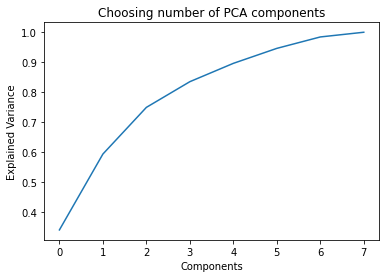

In [18]:
#To figure out number of features to retain to have 95% representation of data
pca_4 = PCA(n_components=8,random_state=0)
X_pca_4 = pca_4.fit_transform(X_2_scaled)
plt.figure()
plt.plot(np.cumsum(pca_4.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("Choosing number of PCA components")
print("Variance explained by First 6 components: ",np.cumsum(pca_4.explained_variance_ratio_)[5])

In [19]:
#To calculate PCA using either standard scaling or minmax scaling, using minmax as it gives better results
pca_5 = PCA(n_components=6,random_state=0) #5Components chosen
X_pca_5 = pca_5.fit_transform(X_2_scaled)   #Minmaxscaler does better job
df_PCA_5 = pd.DataFrame(X_pca_5,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
print("Variance explained by first principal component is  ",pca_5.explained_variance_ratio_[0])
print("Variance explained by second principal component is  ",pca_5.explained_variance_ratio_[1])
print((1-np.cumsum(pca_5.explained_variance_ratio_)[1])*100,' % data is lost if only 2 components considered\n')

Variance explained by first principal component is   0.3409064001548742
Variance explained by second principal component is   0.25297619773693475
40.6117402108191  % data is lost if only 2 components considered



In [20]:
#Convert dataframe to list to find max and min songs for pCA1,pCA2      
pca3_list = df_PCA_5.pc1.tolist()
pca4_list = df_PCA_5.pc2.tolist()
PCA3_maxsong = df.Title[pca3_list.index(max(pca3_list))]
PCA3_minsong = df.Title[pca3_list.index(min(pca3_list))]
PCA4_maxsong = df.Title[pca4_list.index(max(pca4_list))]
PCA4_minsong = df.Title[pca4_list.index(min(pca4_list))]
print("The song at the maximum value of first principal component is ",PCA3_maxsong)
print("The song at the minimum value of first principal component is ",PCA3_minsong)
print("The song at the maximum value of second principal component is ",PCA4_maxsong)
print("The song at the minimum value of second principal component is ",PCA4_minsong)

The song at the maximum value of first principal component is  Summertime
The song at the minimum value of first principal component is  When Doves Cry
The song at the maximum value of second principal component is  Sometimes It Snows in April
The song at the minimum value of second principal component is  Burning Love


Maj 1st PCA suggests song with Lower valence, High acouticness,lower energy, maj 2nd PCA suggests song with high danceability and higher acouticness,genre


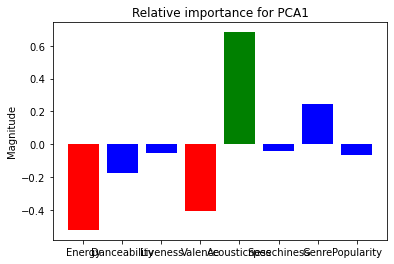

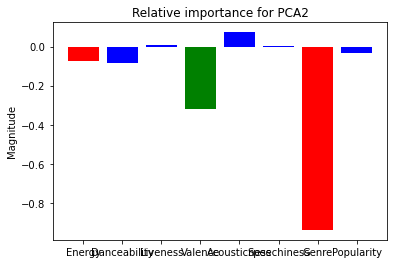

In [21]:
pca3_comp = pca_5.components_[0]
pca4_comp = pca_5.components_[1]
plt.figure()
dummy = [1,2,3,4,5,6,7,8]
tick_label = ['Energy','Danceability','Liveness','Valence','Acousticness','Speechiness','Genre','Popularity']
plt.bar(dummy,pca3_comp,tick_label = tick_label,width = 0.8,color = "rbbrgbbb")
plt.ylabel("Magnitude")
plt.title("Relative importance for PCA1")
plt.figure()
plt.bar(dummy,pca4_comp,tick_label = tick_label,width = 0.8,color = "rbbgbbrb")
plt.ylabel("Magnitude")
plt.title("Relative importance for PCA2")
print("Maj 1st PCA suggests song with Lower valence, High acouticness,lower energy, maj 2nd PCA suggests song with high danceability and higher acouticness,genre")

In [22]:
#Chose song and convert dataframe to numpy arrays
CSong_index = 1039  # User Input
#Testsong = df_PCA.iloc[CSong_index].tolist() #Assign the values from chosen index to list
#Testsongarray = np.array(Testsong) #Convert list to an array
Testsongarray_2 = df_PCA_5.iloc[CSong_index].to_numpy()
Spotifysongarray_2 = df_PCA_5.to_numpy()

In [23]:
dist_2 = np.zeros(len(Spotifysongarray_2)) #Intialise array to calculate distance
for i in range(len(Spotifysongarray_2)): #Calculates distance between all songs and testsongs L2
    dist_2[i] = np.linalg.norm(Spotifysongarray_2[i]-Testsongarray_2)
    
idx_2 = np.argsort(dist_2) #Returns index of the sort from small to large which would correspond to index of original dataframe

print("The chosen song is at index ",idx_2[0],"and song is: ",df.Title[idx_2[0]])
by_popularity = df.loc[[idx_2[1],idx_2[2],idx_2[3],idx_2[4],idx_2[5]]]
sorted_df_pop = by_popularity.sort_values(by='Popularity',ascending=False)
sorted_df_pop_list = sorted_df_pop.Title.tolist()
for j in range(5):
    print("The ",j+1,"st closest song to played song is : ",sorted_df_pop_list[j])


The chosen song is at index  1039 and song is:  We Are The Champions - Remastered 2011
The  1 st closest song to played song is :  Send Me An Angel
The  2 st closest song to played song is :  Nights In White Satin - Single Version / Mono Mix
The  3 st closest song to played song is :  Still Got The Blues
The  4 st closest song to played song is :  School
The  5 st closest song to played song is :  The Show Must Go On - 2011 Mix


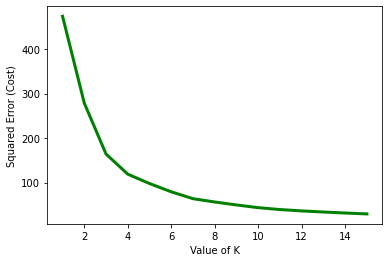

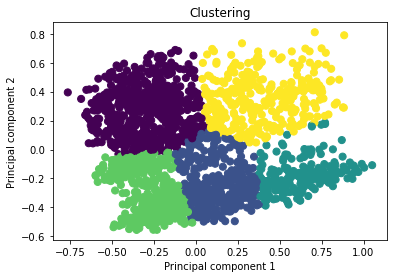

In [24]:
#Clustering songs based on PCA1 PCA2
pca_6 = PCA(n_components=2,random_state=0) #5Components chosen
X_pca_6 = pca_6.fit_transform(X_2_scaled)   #Minmaxscaler does better job
df_PCA_6 = pd.DataFrame(X_pca_6,columns=['pc1','pc2'])
kmax = 15
sse = []
for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X_pca_6)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(X_pca_6)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(X_pca_6)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (X_pca_6[i, 0] - curr_center[0]) ** 2 + (X_pca_6[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)

plt.figure()    
plt.plot(range(1, kmax+1), sse, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

y_kmeans = KMeans(n_clusters=5).fit_predict(X_pca_6)
plt.figure()
plt.scatter(X_pca_6[:, 0], X_pca_6[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Clustering")
plt.show()